<a href="https://colab.research.google.com/github/Zyuuu-G/Quantum_code/blob/main/Quantum_hw_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch

##Quantum hw 2
####Ziyu Gao
####03/02/2023

#####problem 1.
a) I assume that the it'll have 100% (+z) and 0% (-z), because the effect of X & Y measurements are erased so goes back to the very first state (all +z). Then all +z goes through z measurement will produce all +z.

b) The simulation perfectly agrees with the prediction in part a).


In [ ]:
### text problem 1.9

# a) find normalization constant A

xmin=0
xmax=20
num_points=800

x = np.linspace(xmin,xmax,num_points)
psi = x*(1-x)*np.exp(-x) # (x>0) , psi = 0 (x<0)
psi_square = np.real_if_close(np.conjugate(psi)*psi)
prob_tot = np.trapz(psi_square,x)
print('total probability: ',prob_tot)

A = 1/np.sqrt(prob_tot)
print('normalization factor A = ',A)

psi_norm = A*psi
psi_norm_square = np.real_if_close(np.conjugate(psi_norm)*psi_norm)
prob_norm_tot = np.trapz(psi_norm_square,x)
print('normalized total probability: ',prob_norm_tot)


total probability:  0.24999998692067396
normalization factor A =  2.0000000523173065
normalized total probability:  1.0000000000000002


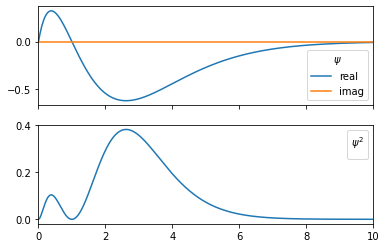

In [ ]:
# b) plot psi and |psi|^2

fig, (ax1,ax2) = plt.subplots(2,1,sharex=True)
plt.xlim(right=10) 
plt.xlim(left=0) 

ax1.plot(x,np.real(psi_norm),x,np.imag(psi_norm))
ax1.legend(title='$\psi$',labels=['real','imag'])

ax2.plot(x,psi_norm_square)
ax2.legend(title='$\psi^2$')

# c) probability of fnding it at x < 1 is about 7%, estimated by looking at the portion of occcupied area

In [ ]:
# d) claculate part c) 

x01 = np.linspace(0,1,500)
psi_d = A*x01*(1-x01)*np.exp(-x01)
psi_d_sq = np.real_if_close(np.conjugate(psi_d)*psi_d)
prob_01 = np.trapz(psi_d_sq,x01)

print('the probability og finding "it" between 0~1 is : ',prob_01)

# 5 percent looks resonable

the probability og finding "it" between 0~1 is :  0.05265302009622476


In [ ]:
# e) we are most likly to find the particle at the peak of the "psi squred" graph,
# which is near x = 2.6 (zoomed in on the graph to estimate that).

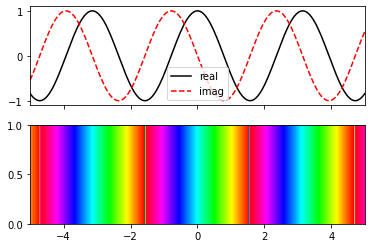

In [ ]:
### text problem 1.11

# Sketch a portion (a few cycles) of the wavefunction of a particle in
# one dimension with a well-definned momentum that is negative.

k=-2
phi = 0
x2=np.linspace(-5,5,200)
cmap = plt.get_cmap('hsv')

psi2 = np.exp(1j*(k*x2+phi)) # if p_x is well defined, position is not, so here I just use a simple sinusoidal 
prob2 = np.real_if_close(np.conjugate(psi2)*psi2)
phase = np.angle(psi2)

fig, (p1,p2) = plt.subplots(2,1,sharex=True)
p1.plot(x2,np.real(psi2),'k-',x2,np.imag(psi2),'r--')
p1.legend(labels=['real','imag'])

p2.plot(x2,prob2)

poly = p2.fill_between(x2,0, prob2, color='none')
img = p2.imshow(phase.reshape(1, -1), extent=[x2[0], x2[-1], 0, prob2.max()], cmap=cmap, aspect='auto')
clip_poly = PathPatch(poly.get_paths()[0], transform=p2.transData)
img.set_clip_path(clip_poly)

plt.show()

In [ ]:
### problem 1.13

# a) alpha should have unit of "area"(something like m^2), because (alpha)*(x^2) should be unitless(rad)



# b) Well, since I suck at maths, I'll use python to solve:

x3 = np.linspace(-1e-8,1e-8,800) # the range were estimated by plotting the function on desmos 
a = 1.2e18 # alpha
psi3 = np.exp(-a*x3*x3)
psi3_sq = np.real_if_close(np.conjugate(psi3)*psi3)
prob_3 = np.trapz(psi3_sq,x3)
print('un-normalized prob: ',prob_3)

A3 = 1/np.sqrt(prob_3)
print('normalization factor A = ',A3)

psi3_norm = A3*psi3
psi3_norm_sq = np.real_if_close(np.conjugate(psi3_norm)*psi3_norm)
prob3_norm = np.trapz(psi3_norm_sq,x3)
print('normalized total probability: ',prob3_norm)
# A should be unitless (I think)

un-normalized prob:  1.1441140410797113e-09
normalization factor A =  29564.146266612588
normalized total probability:  0.9999999999999999


In [ ]:
# c) prob finding "it" between x = 0 ~ 0.5nm

x3c = np.linspace(0,0.5e-9,800)

psi3c = A3*np.exp(-a*x3c*x3c)
psi3c_sq = np.real_if_close(np.conjugate(psi3c)*psi3c)
prob_3c = np.trapz(psi3c_sq,x3c)
print('the probability og finding "it" between 0~0.5nm is : ',prob_3c)

the probability og finding "it" between 0~0.5nm is :  0.363339123284779


In [ ]:
# d) I don't know, the probalility wave function collapse and no longer exists (for this particle)? Now it has a defined position.